# Выявить определяющие успешность игры закономерности


## Описание проекта

Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Инструкция по выполнению проекта

### Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. 

### Шаг 2. Подготовьте данные
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости;
* Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Шаг 3. Проведите исследовательский анализ данных
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

### Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from scipy import stats as st
import seaborn as sns

In [282]:
games_data = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv", sep=",") 
display(games_data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [283]:
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Шаг 2. Подготовьте данные
### 		Замените названия столбцов (приведите к нижнему регистру);

In [284]:
games_data.columns = games_data.columns.str.lower()
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 		Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [285]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразуем тип данных в годе релиза:
- year_of_release - должно быть годом, или хотя бы int, а не float
- user_score - должно быть float

### Год выпуска понадобится для вычислений. Поэтому его потребуется преобразовать в int и заполнить пропуски

### Посмотрим какие вообще значения года выпуска есть

In [286]:
games_data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

### Есть nan в годе выпуска. Оценим сколько таких строк и какие там игры

In [287]:
games_nan_year = games_data.query('year_of_release == "  nan"')
games_nan_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 269 строк с незаполненным годом выпуска игры

In [288]:
len(games_nan_year['name'])

269

### И это 269 уникальных названий игр

### Посмотрим названия

In [289]:
games_nan_year['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

### В некоторых названиях содержится год выпуска игры. Это здорово, сможем заполнить ими год позже, если трудозатраты на обработку будут выглядеть оправданными.
### А пока заполним пропуски нулями, чтобы беспрепятственно конвертнуть тип в int64

In [290]:
games_data['year_of_release'] = games_data['year_of_release'].fillna('0')

In [291]:
games_data['year_of_release'] = games_data['year_of_release'].astype('int64')
games_data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

### 		Обработайте пропуски при необходимости:

In [292]:
games_data.isnull().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
genre                 2
name                  2
other_sales           0
jp_sales              0
eu_sales              0
na_sales              0
year_of_release       0
platform              0
dtype: int64

### Много пропусков в столбцах
* critic_score -       8578
* rating -             6766
* user_score -         6701

Их лучше заполнить, так как обработка данных потребует работы с рейтингом.

### Дважды пропущены данные в стобцах
* genre -                 2
* name -                 2
Эти пропуски оставим без заполнения

### Опишите причины, которые могли привести к пропускам;

### critic_score, user_score и rating могли быть незаполнены по причинам:
* игра старая, и в то время рейтинги еще не собирали
* игра новая и не собрала рейтинги
* игра еще не запущена
* игра не набрала оценок для рейтинга

### Объясните, почему заполнили пропуски определённым образом или почему не стали это делать

### critic_score, user_score
* Рейтинги critic_score, user_score можно заполнить средними значениями по очень точному срезу данных. 
* Я приму допущение что в среднем компания делаем в год по платформе и в жанре игры примерно с одним уровнем качества.
* Для заполнения пропущенных значений в critic_score и user_score возьму их средние значения по вышеуказанному срезу.
* Если в срезе не наберется данных для подсчета среднего, считаю, что у меня нет данных для заполнения рейтингов и оставлю их пустыми или удалю строки из массива в зависимости от их количества.

### raiting
* Поле raiting содержит категориальные данные, значение которых мне не известно.
* Вариант заполнения - погуглить и найти обозначение этих рейтингов, чтобы понять, можно ли посчитать некое "среднее" для заполнения пропущенных значений.
* Если смысл рейтинга выяснить не удастся - оставлю его без заполнения

### Год
* Поле неоднозначное. Просто вычислить среднее все же не вариант.
* Пока нет идей как его заполнить, кроме как 0. Да, встречаются единичные значения названий игр с указанием года, но ручная обработка большого количества названий выглядит трудозатным занятием. 

### Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать

TBD расшифровывается как будет объявлено позже.
Чтобы понять как заменить его на какое-либо значение, нужно озакомиться с данными и проверить гипотезы о причинах незаполнения.
Гипотезы о причинах те же, что и о пропусках в рейтинге:
* игра старая, и в то время рейтинги еще не собирали
* игра новая и не собрала рейтинги
* игра еще не запущена
* игра не набрала оценок для рейтинга

## Посмотрю средний критик скор по жанрам и годам и платформам. Максимально точный срез для вычисления средних значений

In [293]:
games_data_critic_score_mean = games_data.pivot_table(
index = ('platform','year_of_release', 'genre'), values='critic_score', aggfunc=['mean'])
games_data_critic_score_mean = games_data_critic_score_mean.reset_index()
pd.set_option('display.max_rows', 151)
games_data_critic_score_mean

,platform,year_of_release,genre,mean
,,,,critic_score
0,3DS,0,Action,71.000000
1,3DS,0,Shooter,54.000000
2,3DS,2011,Action,57.833333
3,3DS,2011,Adventure,58.333333
4,3DS,2011,Fighting,71.400000
...,...,...,...,...
1201,XOne,2016,Role-Playing,79.333333
1202,XOne,2016,Shooter,77.000000
1203,XOne,2016,Simulation,59.000000


## Смерджу в новую таблицу основные данные и новое поле со средним critic score во все строки. И заполню этим средним отсутствующие значения critic score

In [294]:
games_data_grouped = (games_data
                      .merge(games_data_critic_score_mean, on=('platform', 'year_of_release', 'genre'),how='outer'))
games_data_grouped.reset_index()

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,"(mean, critic_score)"
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,76.333333
1,1,Rapala Tournament Fishing!,Wii,2006,Sports,0.51,0.00,0.00,0.04,NaN,NaN,NaN,76.333333
2,2,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81.0,8,E,76.333333
3,3,Super Swing Golf,Wii,2006,Sports,0.14,0.01,0.07,0.01,72.0,7.8,E10+,76.333333
4,4,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.0,7.4,E,70.000000
16711,16711,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN
16712,16712,Grand Prix Legends,PC,1997,Racing,0.00,0.01,0.00,0.00,NaN,7.5,E,NaN
16713,16713,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [295]:
games_data_grouped.columns

Index([                  'name',               'platform',
              'year_of_release',                  'genre',
                     'na_sales',               'eu_sales',
                     'jp_sales',            'other_sales',
                 'critic_score',             'user_score',
                       'rating', ('mean', 'critic_score')],
      dtype='object')

## Количество строк также как в исходной таблице, ура-ура, мы ничего не потеряли. Продолжаем заполнять пустой критик скор этим средним

In [296]:
games_data_grouped = games_data_grouped.rename(columns={ ('mean', 'critic_score'): 'mean_critic_score'})
games_data_grouped.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'mean_critic_score'],
      dtype='object')

In [297]:
games_data_grouped['critic_score'] = games_data_grouped['critic_score'].fillna(games_data_grouped['mean_critic_score'])
games_data_grouped['critic_score'].isna().sum()

2273

In [298]:
display(games_data_grouped)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mean_critic_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,76.333333
1,Rapala Tournament Fishing!,Wii,2006,Sports,0.51,0.00,0.00,0.04,76.333333,NaN,NaN,76.333333
2,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81.000000,8,E,76.333333
3,Super Swing Golf,Wii,2006,Sports,0.14,0.01,0.07,0.01,72.000000,7.8,E10+,76.333333
4,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.000000,7.4,E,70.000000
16711,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN
16712,Grand Prix Legends,PC,1997,Racing,0.00,0.01,0.00,0.00,NaN,7.5,E,NaN
16713,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


## Ура, пустых значений critic_score стало намного меньше!
## Метод работает, продолжим заполнять пустые значения в user_score
## Для начала надо привести тип к float, но код ругается на наличие строк в этом столбце. Это то самое значение tbd

In [299]:
games_data_grouped['user_score'].unique()

array(['8', nan, '7.8', '8.3', '8.1', '6.2', '6.3', '4.2', 'tbd', '5.7',
       '7.1', '3.8', '2', '0.6', '4.3', '7.4', '8.7', '5.2', '8.8', '4.5',
       '7.2', '8.4', '7.6', '8.6', '7.7', '6.8', '8.5', '7.5', '5.3',
       '7.3', '6.4', '6.9', '6.6', '7.9', '6.1', '6', '7', '5.8', '5.4',
       '0.7', '2.8', '8.2', '6.5', '3.7', '4.8', '5.9', '2.1', '9.1',
       '4.1', '4.9', '5', '9', '9.3', '8.9', '6.7', '5.1', '9.5', '2.5',
       '3.4', '3.9', '4.4', '4.7', '1.2', '3.6', '1.7', '5.5', '3.5',
       '5.6', '3.2', '3.3', '3', '9.2', '2.7', '2.6', '4', '1.9', '1.5',
       '9.4', '1.8', '2.4', '4.6', '3.1', '2.2', '1.6', '1', '0', '0.3',
       '2.9', '1.1', '1.4', '2.3', '9.6', '0.2', '9.7', '0.9', '0.5',
       '1.3'], dtype=object)

In [300]:
pd.set_option('display.max_rows', 151)
games_data_grouped['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.6      72
5.4      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.5      34
4.4      33
4.1      33
9.3      31
3.8      28
4.2      28
4        27
3.5      26
4.7      24
2.8      24
3.1      23
3.4      23
3        21
3.6      20
3.7      19
3.3      15
3.9      13
3.2      13
2.5      12
2.4      11
2        11
9.4      11
2.1       9
2.9       9
1.7       9
2.7       8
9.5       6
1.8       6
2.2       6
1.4       5
2.6       4
1.6       3
1.2       3
0.7       2
1.9       2
0.6 

### Обработаем значение tbd в user_score

In [303]:
len(games_data_grouped[games_data_grouped.user_score == 'tbd'])

2424

## Сравним описание таблицы с user_score без значения tbd и с ним и поищем разницу

In [304]:
games_data_grouped_temp = games_data_grouped[games_data_grouped.user_score != 'tbd'].copy()
games_data_grouped_temp['user_score'] = games_data_grouped_temp['user_score'].astype('float64')
games_data_grouped_temp.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,mean_critic_score
count,14291.000000,14291.000000,14291.000000,14291.000000,14291.000000,12151.000000,7590.000000,12151.000000
mean,1975.295221,0.286670,0.162283,0.090320,0.052681,69.562646,7.125046,69.102480
std,247.644844,0.874623,0.540532,0.332179,0.200815,12.147970,1.500006,7.856181
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,17.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,62.600000,6.400000,64.428571
50%,2007.000000,0.080000,0.030000,0.000000,0.010000,70.000000,7.500000,68.857143
75%,2011.000000,0.260000,0.130000,0.050000,0.040000,78.000000,8.200000,73.750000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,98.000000


In [305]:
games_data_grouped[games_data_grouped.user_score == 'tbd'].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,mean_critic_score
count,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2291.000000,2291.000000
mean,1967.698845,0.126052,0.043519,0.002727,0.015862,63.097727,65.538352
std,279.755511,0.180586,0.111412,0.026136,0.039156,9.214677,6.142763
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,40.333333
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,58.428571,62.100000
50%,2008.000000,0.075000,0.010000,0.000000,0.010000,63.555556,65.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.414773,69.500000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000,86.000000


## Отличия между описанием датасета без user_score = tbd и с user_score = tbd:
* Средние значения продаж: 
na_sales 0.286670 vs 0.126052
eu_sales 0.162283 vs 0.043519
jp_sales 0.090320 vs 0.002727
other_sales 0.052681 vs 0.015862

При этом можно заметить, что средние critic_score так сильно не отличаются - 69.562646  vs 63.097727.
### Вывод. То есть игры с рейтингом tbd были выпущены, критики их оценили, а вот зрители - нет. И продажи таких игр ниже в 2-4 раза в разных странах. Сделаем предположение, что это непопулярные игры.
### Проставим им минимальный рейтинг по user_score из датасета без значения tbd.

In [306]:
games_data_user_score_mean = games_data_grouped_temp.pivot_table(
index = ('platform','year_of_release', 'genre'), values='user_score', aggfunc=['mean'])
games_data_user_score_mean = games_data_user_score_mean.reset_index()
pd.set_option('display.max_rows', 151)
games_data_user_score_mean

,platform,year_of_release,genre,mean
,,,,user_score
0,3DS,0,Action,6.500000
1,3DS,0,Adventure,4.200000
2,3DS,0,Shooter,6.300000
3,3DS,2011,Action,5.929412
4,3DS,2011,Adventure,6.700000
...,...,...,...,...
1234,XOne,2016,Role-Playing,7.733333
1235,XOne,2016,Shooter,6.545455
1236,XOne,2016,Simulation,6.300000


In [307]:
games_data_grouped = (games_data_grouped
                      .merge(games_data_user_score_mean, on=('platform', 'year_of_release', 'genre'),how='outer'))
games_data_grouped.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mean_critic_score,"(mean, user_score)"
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,76.333333,7.933333
1,1,Rapala Tournament Fishing!,Wii,2006,Sports,0.51,0.00,0.00,0.04,76.333333,NaN,NaN,76.333333,7.933333
2,2,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81.000000,8,E,76.333333,7.933333
3,3,Super Swing Golf,Wii,2006,Sports,0.14,0.01,0.07,0.01,72.000000,7.8,E10+,76.333333,7.933333
4,4,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.000000,7.4,E,70.000000,7.400000
16711,16711,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN
16712,16712,Grand Prix Legends,PC,1997,Racing,0.00,0.01,0.00,0.00,NaN,7.5,E,NaN,7.500000
16713,16713,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [308]:
games_data_grouped.columns

Index([                'name',             'platform',      'year_of_release',
                      'genre',             'na_sales',             'eu_sales',
                   'jp_sales',          'other_sales',         'critic_score',
                 'user_score',               'rating',    'mean_critic_score',
       ('mean', 'user_score')],
      dtype='object')

In [309]:
games_data_grouped = games_data_grouped.rename(columns={ ('mean', 'user_score'): 'mean_user_score'})
games_data_grouped.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'mean_critic_score', 'mean_user_score'],
      dtype='object')

In [310]:
user_score_min = games_data_grouped['mean_user_score'].min()
user_score_min

1.3

In [311]:
games_data_grouped['user_score'] = games_data_grouped['user_score'].replace('tbd',user_score_min)
len(games_data_grouped[games_data_grouped.user_score == 'tbd'])

0

### Пропущенные значения user_score заполним средними, вычисленными в таблице без tbd 

In [312]:
games_data_grouped['user_score'] = games_data_grouped['user_score'].fillna(games_data_grouped['mean_user_score'])
games_data_grouped['user_score'].isna().sum()

1920

### Было незаполнено 6701 значений user_score и 2424 значений было заполнено как tbd.
После обработки - 0 tbd и 1920 незаполненных значений user_score.
Неплохой результат обработки.

Посмотрим что же там осталось незаполненным

In [313]:
games_data_user_score_isna = games_data_grouped.query('user_score.isna()')
display(games_data_user_score_isna)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mean_critic_score,mean_user_score
4,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
5,Ice Climber,NES,1985,Platform,0.46,0.10,0.92,0.02,NaN,NaN,NaN,NaN,NaN
6,Balloon Fight,NES,1985,Platform,0.39,0.09,0.43,0.01,NaN,NaN,NaN,NaN,NaN
7,Wrecking Crew,NES,1985,Platform,0.00,0.00,0.51,0.00,NaN,NaN,NaN,NaN,NaN
98,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,Bakumatsu Rock: Ultra Soul,PSP,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN
16706,Turbo Trainz,Wii,2012,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN
16711,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN
16713,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [314]:
games_data_user_score_isna.groupby(['platform'])['name'].count()

platform
2600    133
3DO       3
3DS      19
DC       26
DS       99
GB       98
GBA      14
GC       10
GEN      27
GG        1
N64     319
NES      98
NG       12
PC       34
PCFX      1
PS      343
PS2      49
PS3      20
PS4       2
PSP     119
PSV      23
SAT     173
SCD       6
SNES    239
TG16      2
WS        6
Wii      19
WiiU      9
X360      6
XB        5
XOne      3
Name: name, dtype: int64

In [315]:
games_data_user_score_isna.groupby(['year_of_release'])['name'].count()

year_of_release
0        49
1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     42
1993     60
1994    119
1995    219
1996    193
1997    159
1998    146
1999    148
2000     91
2001     33
2002     16
2003     12
2004     15
2005      4
2006     14
2007      9
2008      6
2009     25
2010     45
2011     75
2012     58
2013     56
2014     27
2015     21
2016     16
Name: name, dtype: int64

### Можно отметить, что из оставшихся незаполненными значений user_score выделяются:
* Топ-3 платформы, по которым много игр без пользовательского рейтинга:
* N64     319
* PS      343
* SNES    239
---
* Есть годы, за которые наблюдается более 100 игр без пользовательского рейтинга:
* 1994    119
* 1995    219
* 1996    193
* 1997    159
* 1998    146
* 1999    148
---
Составлю прелположения:
* либо эти платформы были непопулярны, 
* либо в диапазон лет с 1994 по 1999 были непопулярны игры вообще и / или игры этой компании в частности
* либо пользователей не агитировали оставлять рейтинги по этим платформам / годам

## Заполним пропуски в поле rating

In [317]:
games_data_rating_isna = games_data_grouped.query('rating.isna()')
display(games_data_rating_isna)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mean_critic_score,mean_user_score
1,Rapala Tournament Fishing!,Wii,2006,Sports,0.51,0.00,0.00,0.04,76.333333,7.93333,NaN,76.333333,7.933333
4,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
5,Ice Climber,NES,1985,Platform,0.46,0.10,0.92,0.02,NaN,NaN,NaN,NaN,NaN
6,Balloon Fight,NES,1985,Platform,0.39,0.09,0.43,0.01,NaN,NaN,NaN,NaN,NaN
7,Wrecking Crew,NES,1985,Platform,0.00,0.00,0.51,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Turbo Trainz,Wii,2012,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN
16709,Captain Morgane and the Golden Turtle,Wii,2012,Adventure,0.00,0.01,0.00,0.00,NaN,1.3,NaN,NaN,NaN
16711,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN
16713,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [318]:
games_data_grouped['rating'].unique()

array(['E', nan, 'E10+', 'T', 'M', 'EC', 'K-A', 'AO', 'RP'], dtype=object)

### Нагуглено следующее значение рейтингов ESRB:
«E» («Everyone») — «Для всех»
"E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»
«EC» («Early childhood») — «Для детей младшего возраста»
«AO» («Adults Only 18+») — «Только для взрослых»
«RP» («Rating Pending») — «Рейтинг ожидается»
'K-A' This rating was known as Kids to Adults (K-A) until 1998, when it was renamed "Everyone".

Так как выводить некие средние для контента игр не выглядит рабочим вариантом, предложу 2 способа заполнить пропуски:
1. Присвоить рейтинг «RP» («Rating Pending») — «Рейтинг ожидается», но тогда принимать во внимание, что в дальнейшем анализе это значение рейтинга не может принимать учатие. Во всяком случае, выводов по этому значению делать нельзя
2. Присвоить самый жесткий рейтинг и AO. Но этот способ считаю менее правильным - все же влияние жесткого рейтинга может быть интересно для анализа задачи.
---
### Поэтому выбираю первый вариант - заполняем пропуски rating значением «RP» («Rating Pending») — «Рейтинг ожидается»

In [319]:
games_data_grouped['rating'] = games_data_grouped['rating'].fillna('RP')
games_data_grouped['rating'].isna().sum()

0

### 		Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [320]:
games_data_grouped['total_sales'] = games_data_grouped['eu_sales'] + games_data_grouped['jp_sales'] + games_data_grouped['jp_sales']

In [321]:
games_data_grouped.sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mean_critic_score,mean_user_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,76.333333,7.933333,36.50
98,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,NaN,NaN,29.33
103,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,72.363636,7.555556,22.14
155,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,RP,NaN,NaN,20.58
8,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,49.500000,5.592308,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,Greg Hastings' Tournament Paintball Max'd,PS2,2006,Shooter,0.01,0.00,0.00,0.00,70.0,9.2,E10+,59.769231,7.308333,0.00
14325,WWE SmackDown! vs. RAW 2006,PSP,2005,Fighting,0.36,0.00,0.00,0.03,81.0,8.5,T,67.333333,8.166667,0.00
14326,Marvel Nemesis: Rise of the Imperfects,PSP,2005,Fighting,0.29,0.00,0.00,0.02,58.0,8.7,T,67.333333,8.166667,0.00
14327,The Con,PSP,2005,Fighting,0.18,0.00,0.00,0.02,63.0,7.3,T,67.333333,8.166667,0.00


## Шаг 3. Проведите исследовательский анализ данных
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
5. Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
7. Соотнесите выводы с продажами игр на других платформах.
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### 3.1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [322]:
games_data_grouped.groupby(['year_of_release'])['name'].count()
games_data_year_importancy = games_data_grouped.pivot_table(
index = ('year_of_release'), values='name', aggfunc=['count'])


In [323]:
games_data_year_importancy = games_data_year_importancy.reset_index()
pd.set_option('display.max_rows', 151)
games_data_year_importancy

,year_of_release,count
,,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16


In [324]:
games_data_year_importancy.columns

MultiIndex([('year_of_release',     ''),
            (          'count', 'name')],
           )

In [325]:
games_data_year_importancy.columns=['year_of_release', 'name_count']
games_data_year_importancy['year_of_release'] =games_data_year_importancy['year_of_release'].astype('int64')
games_data_year_importancy['name_count'] =games_data_year_importancy['name_count'].astype('int64')
games_data_year_importancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
year_of_release    38 non-null int64
name_count         38 non-null int64
dtypes: int64(2)
memory usage: 736.0 bytes


In [326]:
games_data_year_importancy = games_data_year_importancy[games_data_year_importancy.year_of_release >1]

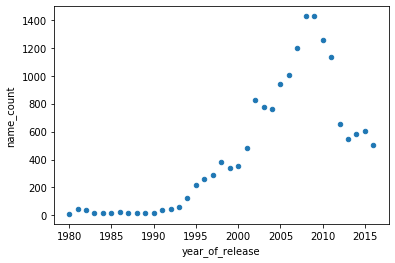

In [327]:
games_data_year_importancy.plot(kind='scatter', y='name_count', x='year_of_release')
plt.show()

### Значительный прирост игр можно отметить с 1998 года

# Видимо, по условиям задачи нужно вырезать  данные за годы ранее 1998 из датасета. Вырезаем

In [328]:
games_data_grouped = games_data_grouped[games_data_grouped.year_of_release >= 1998]
games_data_grouped

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mean_critic_score,mean_user_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,76.333333,7.933333,36.50
1,Rapala Tournament Fishing!,Wii,2006,Sports,0.51,0.00,0.00,0.04,76.333333,7.93333,RP,76.333333,7.933333,0.00
2,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81.000000,8,E,76.333333,7.933333,0.00
3,Super Swing Golf,Wii,2006,Sports,0.14,0.01,0.07,0.01,72.000000,7.8,E10+,76.333333,7.933333,0.15
8,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,49.500000,5.592308,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,Captain Morgane and the Golden Turtle,Wii,2012,Adventure,0.00,0.01,0.00,0.00,NaN,1.3,RP,NaN,NaN,0.01
16710,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.000000,7.4,E,70.000000,7.400000,0.02
16711,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,RP,NaN,NaN,0.01
16713,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,RP,NaN,NaN,0.00


## 3.2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
## Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

In [329]:
games_data_platform_sales = games_data_grouped.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
games_data_platform_sales.reset_index()

platform,year_of_release,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
0,1998,NaN,3.47,NaN,26.10,NaN,NaN,23.43,0.20,105.70,...,NaN,NaN,7.64,0.44,NaN,NaN,NaN,NaN,NaN,NaN
1,1999,NaN,6.63,NaN,32.41,NaN,NaN,26.82,1.13,98.74,...,NaN,NaN,0.18,0.52,0.92,NaN,NaN,NaN,NaN,NaN
2,2000,NaN,5.87,NaN,20.24,0.02,NaN,21.03,1.45,59.75,...,NaN,NaN,NaN,NaN,1.36,NaN,NaN,NaN,0.21,NaN
3,2001,NaN,2.14,NaN,10.97,30.84,12.50,1.58,1.24,21.44,...,NaN,NaN,NaN,NaN,0.56,NaN,NaN,NaN,5.39,NaN
4,2002,NaN,0.58,NaN,NaN,41.54,21.05,0.02,3.18,5.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.76,NaN
5,2003,NaN,NaN,NaN,NaN,30.37,23.09,NaN,4.92,0.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.09,NaN
6,2004,NaN,NaN,11.23,NaN,45.19,11.33,NaN,7.70,NaN,...,5.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,NaN
7,2005,NaN,NaN,101.21,NaN,14.85,10.27,NaN,2.69,NaN,...,16.15,NaN,NaN,NaN,NaN,NaN,NaN,0.99,12.53,NaN
8,2006,NaN,NaN,100.19,NaN,4.00,2.70,NaN,1.94,NaN,...,22.70,NaN,NaN,NaN,NaN,61.92,NaN,13.24,2.25,NaN
9,2007,NaN,0.04,87.41,NaN,0.90,0.06,NaN,6.21,NaN,...,25.64,NaN,NaN,NaN,NaN,68.20,NaN,25.21,0.12,NaN


In [330]:
games_data_platform_sales.columns

Index(['3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'N64', 'PC', 'PS', 'PS2', 'PS3',
       'PS4', 'PSP', 'PSV', 'SAT', 'SNES', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='platform')

In [331]:
games_data_platform_sales_filter = games_data_platform_sales.describe().loc['max'].sort_values(ascending=False).head(10)
games_data_platform_sales_filter

platform
PS2     108.97
PS      105.70
DS      101.21
Wii      91.45
PS3      84.44
PS4      64.38
3DS      61.98
X360     50.53
GBA      45.19
PSP      42.14
Name: max, dtype: float64

In [332]:
sales_mean = games_data_platform_sales.describe().loc['max'].mean()
sales_mean

42.535454545454556

In [333]:
platforms_list = pd.Series(['PS2','PS','DS','Wii','PS3','PS4','3DS','X360','GBA','PSP'])

In [334]:
games_data_platform_sales_filtered = games_data_grouped.query('platform in @platforms_list').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
games_data_platform_sales_filtered.reset_index()

platform,year_of_release,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
0,1998,NaN,NaN,NaN,105.70,NaN,NaN,NaN,NaN,NaN,NaN
1,1999,NaN,NaN,NaN,98.74,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,NaN,NaN,0.02,59.75,28.38,NaN,NaN,NaN,NaN,NaN
3,2001,NaN,NaN,30.84,21.44,87.95,NaN,NaN,NaN,NaN,NaN
4,2002,NaN,NaN,41.54,5.17,108.97,NaN,NaN,NaN,NaN,NaN
5,2003,NaN,NaN,30.37,0.78,98.96,NaN,NaN,NaN,NaN,NaN
6,2004,NaN,11.23,45.19,NaN,94.35,NaN,NaN,5.76,NaN,NaN
7,2005,NaN,101.21,14.85,NaN,70.96,NaN,NaN,16.15,NaN,0.99
8,2006,NaN,100.19,4.00,NaN,56.89,9.54,NaN,22.70,61.92,13.24
9,2007,NaN,87.41,0.90,NaN,30.07,34.54,NaN,25.64,68.20,25.21


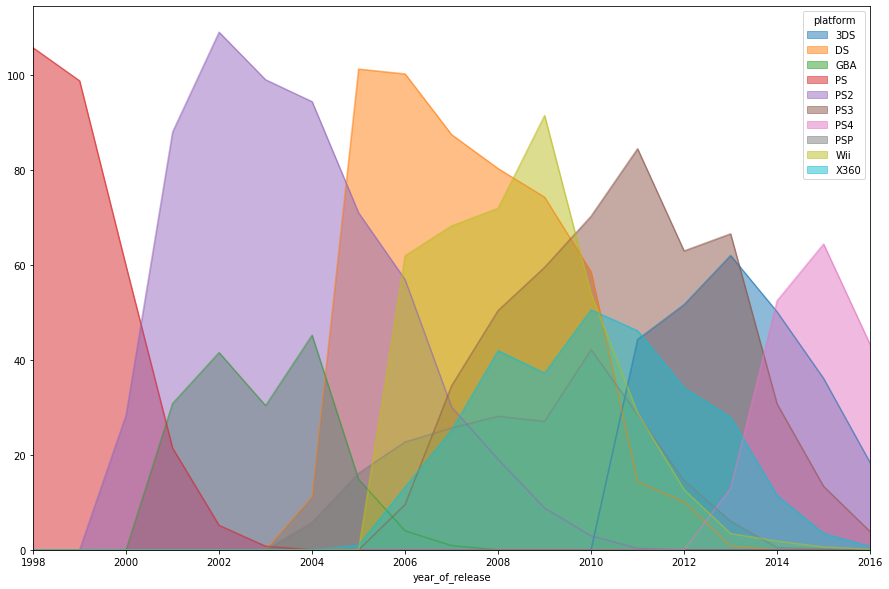

In [335]:
games_data_platform_sales_filtered.plot(kind='area', stacked=False, figsize=(15,10))
plt.show()

## Вывод из графика:
### Средний срок жизни платформы - от 7 до 12 лет:
* 1999-2011 (12 лет)
* 2000 - 2007 (7 лет)
* дважды - 2003-2014 (11 лет)
* 2004-2014 (10 лет)
* 2005-2013 (8 лет)
* 2010-...
* 2010-...

## 3.3 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


Лидируют по продажам на промежутке времени с 1998 года по 2016:
* PS
* PS2
* DS
* Wii
* PS3

Падают на конец 2016:
* 3DS
* PS3
* PS4
* Wii
* X360

Растущих платформ нет

Потенциально прибыльные платформы с остаточной прибылью:
* 3DS
* PS4
* еще немного прибыли можно получить с PS3

## 3.4 Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.


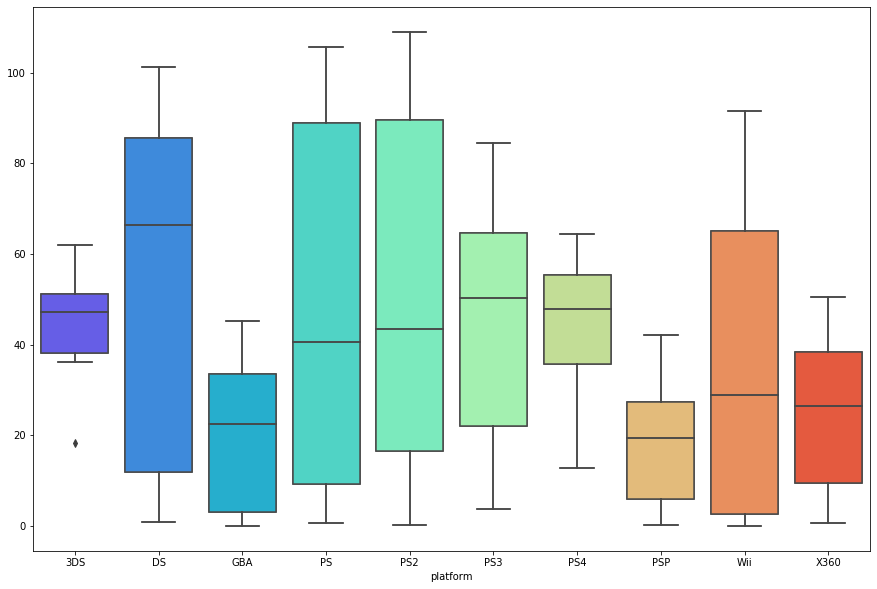

In [336]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = games_data_platform_sales_filtered)
#plt.ylim(0, 500)
sns.boxplot(data=games_data_platform_sales_filtered, palette='rainbow', showfliers=False)
plt.show()

### Велика ли разница в продажах? 
Да, разница есть.
Можно выделить 4 крупные по продажам платформы:
* PS
* PS2
* DS
* Wii

3 платформы поменьше:
* GBA
* PS3
* X360

и 3 совсем маленькие платформы:
* 3DS
* PS4
* PSP


### А в средних продажах на разных платформах?
В средних продажах разница не так велика.
В нижней части диапазона средних продаж находятся платформы:
* GBA
* PSP
* Wii
* X360

В верхней части диапазона находится платформа DS

Все остальные платформы в середине диапазона на близких друг к другу средних значениях продаж

## 3.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


In [347]:
games_data_3DS_user_score_sales = games_data_grouped.query('platform == "3DS"')
games_data_3DS_user_score_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mean_critic_score,mean_user_score,total_sales
572,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.0,7.55,RP,68.0,7.55,12.89
573,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,68.0,7.55,RP,68.0,7.55,6.88
574,Yokai Watch,3DS,2013,Role-Playing,0.25,0.45,1.33,0.05,68.0,7.55,RP,68.0,7.55,3.11
575,Mario & Luigi: Dream Team,3DS,2013,Role-Playing,0.89,0.58,0.46,0.14,68.0,7.55,RP,68.0,7.55,1.50
576,Puzzle & Dragons,3DS,2013,Role-Playing,0.00,0.00,1.51,0.00,68.0,7.55,RP,68.0,7.55,3.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16312,Nekketsu Kouha Kunio-Kun SP: Rantou Kyousoukyoku,3DS,2013,Fighting,0.00,0.00,0.03,0.00,NaN,NaN,RP,NaN,NaN,0.06
16346,E.X. Troopers,3DS,2012,Shooter,0.00,0.00,0.07,0.00,NaN,NaN,RP,NaN,NaN,0.14
16448,Culdcept Revolt,3DS,2016,Strategy,0.00,0.00,0.06,0.00,NaN,NaN,RP,NaN,NaN,0.12
16451,SpongeBob SquarePants: Plankton's Robotic Revenge,3DS,2013,Shooter,0.00,0.06,0.00,0.00,NaN,1.3,E10+,NaN,NaN,0.06


In [359]:
games_data_3DS_user_score_sales['user_score'].isna().sum()
games_data_3DS_user_score_sales['user_score'] = games_data_3DS_user_score_sales['user_score'].fillna(0)
games_data_3DS_user_score_sales

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mean_critic_score,mean_user_score,total_sales
572,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.0,7.55,RP,68.0,7.55,12.89
573,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,68.0,7.55,RP,68.0,7.55,6.88
574,Yokai Watch,3DS,2013,Role-Playing,0.25,0.45,1.33,0.05,68.0,7.55,RP,68.0,7.55,3.11
575,Mario & Luigi: Dream Team,3DS,2013,Role-Playing,0.89,0.58,0.46,0.14,68.0,7.55,RP,68.0,7.55,1.50
576,Puzzle & Dragons,3DS,2013,Role-Playing,0.00,0.00,1.51,0.00,68.0,7.55,RP,68.0,7.55,3.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16312,Nekketsu Kouha Kunio-Kun SP: Rantou Kyousoukyoku,3DS,2013,Fighting,0.00,0.00,0.03,0.00,NaN,0,RP,NaN,NaN,0.06
16346,E.X. Troopers,3DS,2012,Shooter,0.00,0.00,0.07,0.00,NaN,0,RP,NaN,NaN,0.14
16448,Culdcept Revolt,3DS,2016,Strategy,0.00,0.00,0.06,0.00,NaN,0,RP,NaN,NaN,0.12
16451,SpongeBob SquarePants: Plankton's Robotic Revenge,3DS,2013,Shooter,0.00,0.06,0.00,0.00,NaN,1.3,E10+,NaN,NaN,0.06


In [379]:
games_data_3DS_user_score_sales['user_score'].unique()
games_data_3DS_user_score_sales['user_score'] = games_data_3DS_user_score_sales['user_score'].astype('float64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


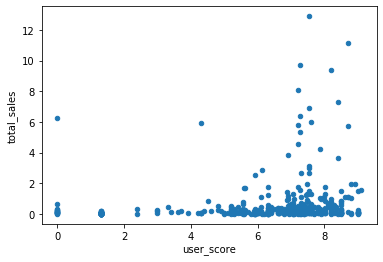

In [380]:
games_data_3DS_user_score_sales.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

### По диаграмме рассеяния видно, что продажи начинают расти с пользовательского рейтинга от 5,5, за исключением выброса одной точки с рейтингом около 4,4. Однако с ростом рейтинга большая часть игр все равно имеет низкие продажи

In [381]:
games_data_3DS_user_score_sales['user_score'].corr(games_data_3DS_user_score_sales['total_sales'])

0.151715704325732

In [382]:
games_data_3DS_user_score_sales['critic_score'].corr(games_data_3DS_user_score_sales['total_sales'])

0.20538892998746297

### Вывод
Значение коэффициента корреляции Пирсона близко к нулю, значит связь слабая, либо отсутствует вовсе. Бывает, что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер. Потому-то коэффициент корреляции такую связь не берёт.

### То есть связи или нет, или она не линейная.

##  Соотнесите выводы с продажами игр на других платформах.

In [363]:
pd.set_option('display.max_rows', 220)
display(games_data_grouped.groupby('platform').corr())

year_of_release  na_sales  eu_sales  jp_sales  \
platform                                                                    
3DS      year_of_release           1.000000 -0.099383 -0.088037  0.039475   
         na_sales                 -0.099383  1.000000  0.943670  0.664840   
         eu_sales                 -0.088037  0.943670  1.000000  0.686445   
         jp_sales                  0.039475  0.664840  0.686445  1.000000   
         other_sales              -0.095013  0.991024  0.971201  0.672817   
         critic_score              0.165532  0.183328  0.171722  0.198838   
         mean_critic_score         0.211502  0.026279  0.028234  0.118510   
         mean_user_score           0.354248 -0.000562 -0.027230  0.099447   
         total_sales               0.003417  0.796779  0.830491  0.975150   
DC       year_of_release           1.000000 -0.133674 -0.131389 -0.280250   
         na_sales                 -0.133674  1.000000  0.797678  0.098652   
         eu_sales                 -0.131389  0.797678  1.000000  0.333708   
         jp_sales                 -0.280250  0.098652  0.333708  1.000000   
         other_sales              -0.130547  0.875590  0.984311  0.272361   
         critic_score             -0.326339  0.089233 -0.088890 -0.101344   
         mean_critic_score        -0.327557  0.089566 -0.089222 -0.089029   
         mean_user_score          -0.044233 -0.304734 -0.067553  0.340532   
         total_sales              -0.277217  0.368543  0.634273  0.940454   
DS       year_of_release           1.000000 -0.114758 -0.089831 -0.105504   
         na_sales                 -0.114758  1.000000  0.871289  0.687767   
         eu_sales                 -0.089831  0.871289  1.000000  0.688301   
         jp_sales                 -0.105504  0.687767  0.688301  1.000000   
         other_sales              -0.104433  0.935609  0.979990  0.702937   
         critic_score              0.132652  0.142678  0.139714  0.191120   
         mean_critic_score         0.208086 -0.005921  0.011612  0.079984   
         mean_user_score           0.015429  0.005661  0.029511  0.097901   
         total_sales              -0.107728  0.821819  0.876036  0.952810   
GB       year_of_release           1.000000 -0.252789 -0.248568 -0.249652   
         na_sales                 -0.252789  1.000000  0.974412  0.769401   
         eu_sales                 -0.248568  0.974412  1.000000  0.803161   
         jp_sales                 -0.249652  0.769401  0.803161  1.000000   
         other_sales              -0.154192  0.797638  0.790870  0.589585   
         critic_score                   NaN       NaN       NaN       NaN   
         mean_critic_score              NaN       NaN       NaN       NaN   
         mean_user_score                NaN       NaN       NaN       NaN   
         total_sales              -0.260962  0.876888  0.909380  0.978196   
GBA      year_of_release           1.000000 -0.092636 -0.085720 -0.038571   
         na_sales                 -0.092636  1.000000  0.934322  0.666945   
         eu_sales                 -0.085720  0.934322  1.000000  0.746473   
         jp_sales                 -0.038571  0.666945  0.746473  1.000000   
         other_sales              -0.101641  0.910430  0.953685  0.799915   
         critic_score             -0.215402  0.141726  0.122573  0.159751   
         mean_critic_score        -0.337571  0.058660  0.049868  0.153764   
         mean_user_score          -0.259046  0.058150  0.051944  0.136120   
         total_sales              -0.055718  0.790087  0.869830  0.977589   
GC       year_of_release           1.000000 -0.114178 -0.117485 -0.119880   
         na_sales                 -0.114178  1.000000  0.938265  0.724893   
         eu_sales                 -0.117485  0.938265  1.000000  0.649008   
         jp_sales                 -0.119880  0.724893  0.649008  1.000000   
         other_sales              -0.129916  0.968810  0.938659  0.782773   
         critic_score   

### В некоторых платформах есть слабая связь между user_score и na_sales и eu_sales - от 0.33 до 0.4.
Сильной связи рейтингов и продаж не наблюдается

## 3.6 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [364]:
games_data_genre_sales = games_data_grouped.pivot_table(index='genre', values='total_sales', aggfunc='sum')
games_data_genre_sales.reset_index()

games_data_genre_sales['total_sales'].sort_values(ascending=False)

genre
Action          768.52
Role-Playing    716.78
Sports          532.36
Misc            388.61
Shooter         348.97
Racing          279.53
Platform        273.97
Simulation      206.08
Fighting        188.76
Adventure       137.52
Strategy        116.61
Puzzle           93.87
Name: total_sales, dtype: float64

### Да, жанр явно влияет на прибыльность.
Жанры в порядке убывания в верхней половине диапазона продаж:
    
* Action          768.52
* Role-Playing    716.78
* Sports          532.36
* Misc            388.61
* Shooter         348.97
* Racing          279.53

## Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

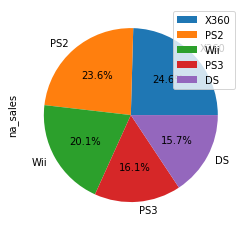

In [365]:
games_data_na_sales = games_data_grouped.pivot_table(index='platform', values='na_sales', aggfunc='sum')
games_data_na_sales.reset_index()

na = games_data_na_sales.sort_values(by='na_sales', ascending=False).head(5)

na.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.show()

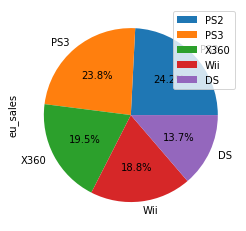

In [366]:
games_data_eu_sales = games_data_grouped.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
games_data_eu_sales.reset_index()

eu = games_data_eu_sales.sort_values(by='eu_sales', ascending=False).head(5)

eu.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.show()

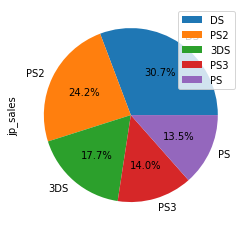

In [367]:
games_data_jp_sales = games_data_grouped.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
games_data_jp_sales.reset_index()

jp = games_data_jp_sales.sort_values(by='jp_sales', ascending=False).head(5)
jp.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.show()

### Портрет пользователя по региону

регион NA, Топ-5 популярных платформ их распределение долей продаж в них:
X360 (24,6%), PS3(23,8%), Wii(20,1%), PS3 (16,1%), DS (15,7%) 

регион eu , Топ-5 популярных платформ их распределение долей продаж в них:
PS2 (24,2%) , PS3(23,8%), X360(19,5%), Wii (18,8%), DS (13,7%)

регион jp, Топ-5 популярных платформ их распределение долей продаж в них:
DS (30,7%), PS2 (24,2%), 3DS (17,7%), PS3 (14%), PS (13,5%)


### Самые популярные жанры (топ-5). Поясните разницу.

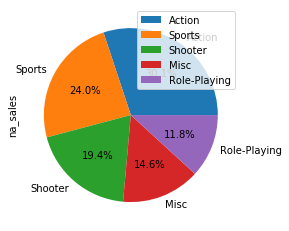

In [368]:
games_data_na_sales_2 = games_data_grouped.pivot_table(index='genre', values='na_sales', aggfunc='sum')
games_data_na_sales_2.reset_index()

na_2 = games_data_na_sales_2.sort_values(by='na_sales', ascending=False).head(5)

na_2.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.show()

## В na больше всего играют в жанры:
* ACtions
* Sports
* Shooter
* Misc
* Roleplay

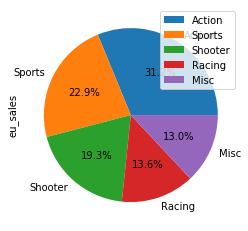

In [369]:
games_data_eu_sales_2 = games_data_grouped.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
games_data_eu_sales_2.reset_index()

eu_2 = games_data_eu_sales_2.sort_values(by='eu_sales', ascending=False).head(5)

eu_2.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.show()

## В eu больше всего играют в жанры:
* ACtions
* Sports
* Shooter
* Racing
* Misc

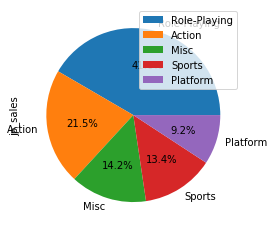

In [370]:
games_data_jp_sales_2 = games_data_grouped.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
games_data_jp_sales_2.reset_index()

jp_2 = games_data_jp_sales_2.sort_values(by='jp_sales', ascending=False).head(5)

jp_2.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.show()

## В jp больше всего играют в жанры:
* Roleplay
* ACtions
* Misc
* Sports
* Platform

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Построить табличку: по строкам рейтинг, по столбцам – регион. В ячейках – доля продаж игр с таким рейтингом в регионе. (например). Собственно говоря, искать паттерны: игры с более высоким рейтингом лучше продаются во всех регионах или нет.

In [371]:
games_data_platform_region_sales = (games_data_grouped
                             .pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum'))
games_data_platform_region_sales.reset_index()


,rating,eu_sales,jp_sales,na_sales
0,AO,0.61,0.00,1.26
1,E,698.86,195.13,1268.23
2,E10+,183.33,40.20,345.50
3,EC,0.11,0.00,1.53
4,M,476.55,62.11,734.87
5,RP,445.23,478.10,698.28
6,T,410.49,142.66,734.36


### Влияние рейтинга ESBR на продажи в регионе:
рейтинг явно влияет на продажи в регионе
Считаем плохими продажам до 1, низкими продажами до 200, средними до 500, высокими свыше 500
* AO и EC плохо продается во всех регионах
* E плохо продается в jp, хорошо - в eu, и в 2 раза лучше в na
* E10+ имеет небольшие продажи в jp - 40, в 4 раза выше в eu, и почти на порядок выше в na
* M имеет низкие продажи в jp, хорошие продажи в eu (476), высокие в na
* RP имеет хорошие продажи в eu и jp, высокие в na
* T имеет невысокие продажи в jp, хорошие в eu и высокие в na

## Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

## Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные. 
Критерий st.ttest_ind так как выборки из одной генеральной совокупности.
Если p-value- меньше порогового значения, то нулевая гипотеза отвергается. Иначе - не отвергается.

In [372]:
games_data_grouped['user_score'] = games_data_grouped['user_score'].astype('float64')
xone = games_data_grouped.query('platform == "XOne"')['user_score'].dropna()
pc = games_data_grouped.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(xone, pc, nan_policy='omit', equal_var=True) 

print('p-value:', results.pvalue)
 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средний рейтинг разный")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средний рейтинг не отличается")

p-value: 0.00315810298659983
Отвергаем нулевую гипотезу. Средний рейтинг разный


## Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

* Нулевая гипотеза: средний пользовательский рейтинг жанров Actions и Sports не отличается.
* Альтернативная гипотеза: средний пользовательский рейтинг жанров Actions и Sports отличается. 
Критерий st.ttest_ind так как выборки из одной генеральной совокупности.
Если p-value- меньше порогового значения, то нулевая гипотеза отвергается. Иначе - не отвергается.

In [373]:
games_data_grouped['user_score'] = games_data_grouped['user_score'].astype('float64')
action = games_data_grouped.query('genre == "Action"')['user_score']
sports = games_data_grouped.query('genre == "Sports"')['user_score']

In [374]:
alpha = 0.05

results = st.ttest_ind(action, sports, nan_policy='omit', equal_var=True)
print('p-value', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средний рейтинг разный')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средний рейтинг не отличается')

p-value 7.540345938651323e-10
Отвергаем нулевую гипотезу. Средний рейтинг разный


# Общий вывод
## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Шаг 1. Получен датасет
Был проведен анализ датасета на 16 тысяч строк с информацией о компьютерных играх магазина. Датасет содержит инфромацию об играх начиная с 1980 года.
Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 2. Подготовили данные

Преобразованы строковые данные в численные типы для расчетов. 
Датасет содержал значимое количество пропусков:
* critic_score       8578
* rating             6766
* user_score         6701
* year_of_release     269

---
* Заполнены отсутствующие значения по critic_score, rating и user_score средними значениями там, где хватило на это данных. 
* year_of_release заполнен нулями, так как вводных из данных для заполнения найдено не было.

---
Возможные причины, которые могли привести к пропускам critic_score, user_score и rating:
* игра старая, и в то время рейтинги еще не собирали
* игра новая и не собрала рейтинги
* игра еще не запущена
* игра не набрала оценок для рейтинга

Была обработана аббревиатура 'tbd' в столбцах с рейтингом:
TBD расшифровывается как будет объявлено позже. 
Анализ показал, что игры с рейтингом tbd были выпущены, критики их оценили, а вот зрители - нет. И продажи таких игр ниже в 2-4 раза в разных странах. Сделаем предположение, что это непопулярные игры.
Проставили им минимальный рейтинг по user_score из датасета без значения tbd.

Также посчитали суммарные продажи во всех регионах и записали в отдельный столбец total_sales.

### Шаг 3. Провели исследовательский анализ данных
Значительный прирост игр можно отметить с 1998 года Вырезали данные за годы ранее 1998 из датасета как наименее важные для задачи. 
Продажи по самым популярным платформам менялись следующим образом:
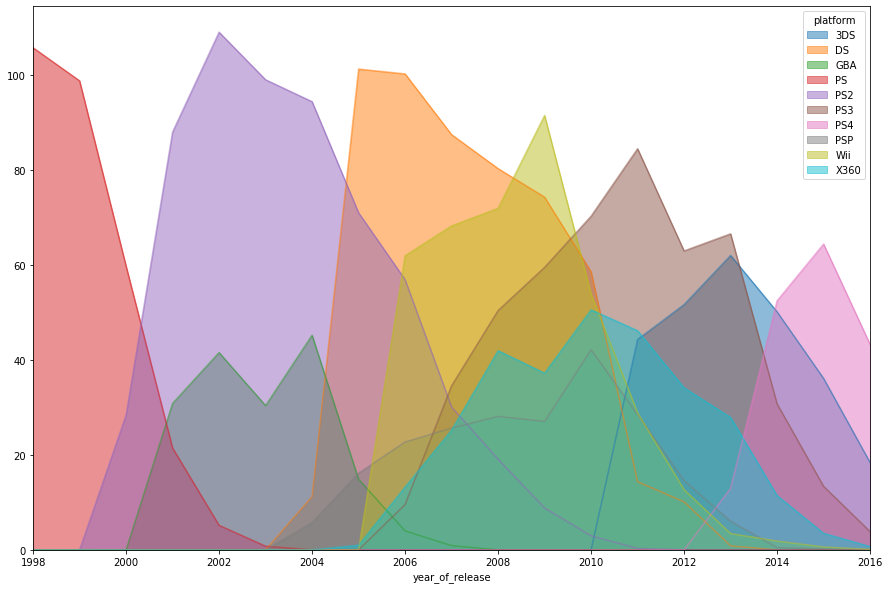
Средний срок жизни платформы - от 7 до 12 лет

--- 
Лидируют по продажам на промежутке времени с 1998 года по 2016: 
* PS, PS2, DS, Wiiб PS3

Падают на конец 2016: 
* 3DS, PS3, PS4, Wii, X360

Растущих платформ нет

Потенциально прибыльные платформы с остаточной прибылью: 
* 3DS, PS4, еще немного прибыли можно получить с PS3

--- 
Разница а продажах платформ есть. Можно выделить 4 крупные по продажам платформы:
* PS, PS2, DS, Wii

3 платформы поменьше:
* GBA, PS3, X360

и 3 совсем маленькие платформы:
* 3DS, PS4, PSP

--- 
В средних продажах разница не так велика.
В нижней части диапазона средних продаж находятся платформы:
* GBA, PSP, Wii, X360

В верхней части диапазона находится платформа DS

Все остальные платформы в середине диапазона на близких друг к другу средних значениях продаж

--- 
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

* По диаграмме рассеяния видно, что продажи начинают расти с пользовательского рейтинга от 5,5, за исключением выброса одной точки с рейтингом около 4,4. Однако с ростом рейтинга большая часть игр все равно имеет низкие продажи
* Значение коэффициента корреляции Пирсона близко к нулю, значит связь слабая, либо отсутствует вовсе. Бывает, что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер. Потому-то коэффициент корреляции такую связь не берёт. То есть связи или нет, или она не линейная.

---
В некоторых платформах есть слабая корреляция между user_score и na_sales и eu_sales - от 0.33 до 0.4. Сильной связи рейтингов и продаж не наблюдается

---

Жанр явно влияет на прибыльность игры.
Жанры в порядке убывания в верхней половине диапазона продаж:
    
* Action          768.52
* Role-Playing    716.78
* Sports          532.36
* Misc            388.61
* Shooter         348.97
* Racing          279.53

### Шаг 4. Составлен портрет пользователя каждого региона

Топ-5 самых популярных платформ  по региону с распределением продаж по долям:

регион NA
* X360 (24,6%), PS3(23,8%), Wii(20,1%), PS3 (16,1%), DS (15,7%) 

регион eu 
* PS2 (24,2%) , PS3(23,8%), X360(19,5%), Wii (18,8%), DS (13,7%)

регион jp
* DS (30,7%), PS2 (24,2%), 3DS (17,7%), PS3 (14%), PS (13,5%)

---
Топ-5 самых популярных жанров по региону
регион na:
* ACtions
* Sports
* Shooter
* Misc
* Roleplay

регион eu:
* ACtions
* Sports
* Shooter
* Racing
* Misc

регион jp:
* Roleplay
* ACtions
* Misc
* Sports
* Platform

Отличия могут быть продиктованы культурными и соцдесм различиями в регионе. 

---
Рейтинг ESBR явно влияет на продажи в регионе.
Считаем плохими продажам до 1, низкими продажами до 200, средними до 500, высокими свыше 500
* AO и EC плохо продается во всех регионах
* E плохо продается в jp, хорошо - в eu, и в 2 раза лучше в na
* E10+ имеет небольшие продажи в jp - 40, в 4 раза выше в eu, и почти на порядок выше в na
* M имеет низкие продажи в jp, хорошие продажи в eu (476), высокие в na
* RP имеет хорошие продажи в eu и jp, высокие в na
* T имеет невысокие продажи в jp, хорошие в eu и высокие в na


## Общий вывод. Рекомендации для развития игр на 2017 год:
* делать игры для потенциально прибыльных платформ с остаточной прибылью: 3DS, PS4, еще немного прибыли можно получить с PS3
* запланировать выпуск новых платформ, так как текущие находятся в упадке и пользователю скоро потребуется замена. 
* в выборе направлений развития новых платформ можно учесть и особенности текущих популярных платформ, и особенности и знания о самых продаваемых платформах вообще (PS, PS2, DS, Wii)
* учесть особенности платформы ds - в средних значенияз продаж она находилась верхней части диапазона находится платформа DS
---
учесть региональные предпочтения по платформам:
* в регионе NA наиболее популярны платформы: X360 (24,6%), PS3(23,8%), Wii(20,1%), PS3 (16,1%), DS (15,7%) 
* в регионе EU наиболее популярны платформы: PS2 (24,2%) , PS3(23,8%), X360(19,5%), Wii (18,8%), DS (13,7%)
* в регионе JP наиболее популярны платформы: DS (30,7%), PS2 (24,2%), 3DS (17,7%), PS3 (14%), PS (13,5%)
---
учесть данные о том, какие жанры наиболее прибыльные в каждом регионе:
* регион na: ACtions, Sports, Shooter, Misc, Roleplay
* регион eu: ACtions, Sports, Shooter, Racing, Misc
* регион jp: Roleplay, ACtions, Misc, Sports, Platform
---
рекомендовано развивать игры с указанным рейтингом ESRB в следующих регионах:
* E - в регионе na, во вторую очередь - в регионе eu
* E10+ - в регионе na, во вторую очередь - в регионе eu
* M - в регионе na, во вторую очередь в регионе eu
* RP - в регионе na, во вторую очередь в eu и jp
* T - в регионе na, во вторую очередь в регионе eu.
---
* также можно в развитии игр помнить, что пользовательский рейтинг может слабо влиять на продажи в регионах na и ru
